# Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the data and doing Feature Engineering using Pandas

In [3]:
df = pd.read_csv('/content/drive/My Drive/My work/Credit card fraud detection/creditcard.csv')

In [4]:
df.head() # to take a quick look dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape # checking shape of the dataframe

(284807, 31)

In [6]:
df.isnull().sum() # checking total number of null values in all columns

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.nunique() # checking number of unique values in all columns

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [10]:
df.Class[df['Class']==1].count() # there is 492 fraud cases in whole dataset

492

In [11]:
df.columns # these are the columns in our dataset

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
# Time, V1 to V9 with Class column
columns_1 = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'Class']

# V10 to V19 with class
columns_2 = ['V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'Class']

# V20 to Amount and CLass
columns_3 = [ 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

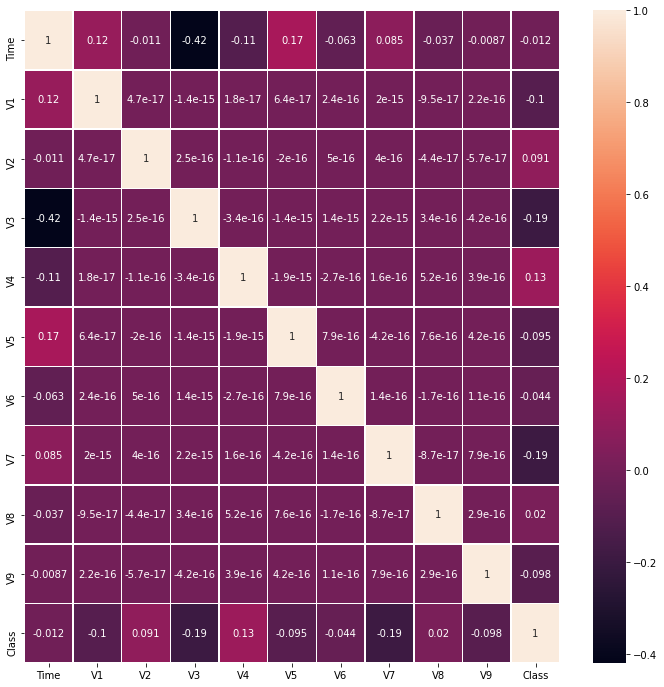

In [13]:
corelation = df[columns_1].corr()
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(corelation, annot=True, linewidths=.5, ax=ax)

#Time and V3 has corelation of -0.42

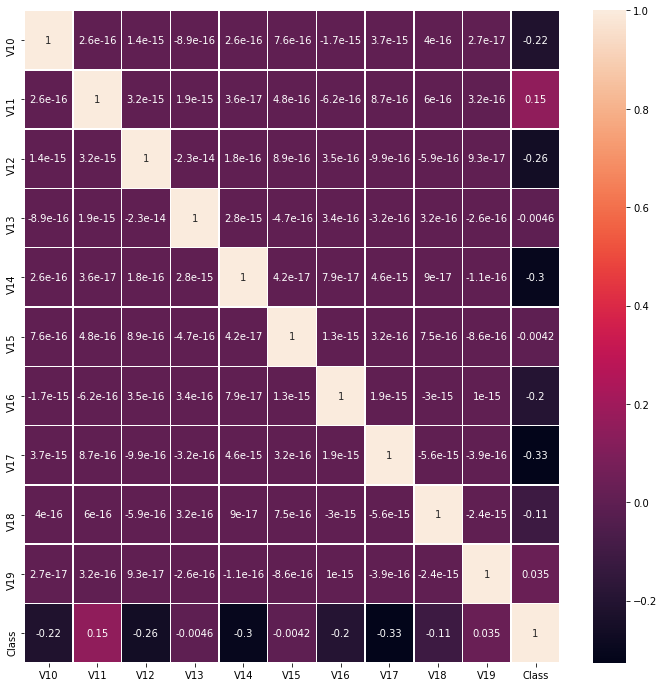

In [14]:
corelation = df[columns_2].corr()
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(corelation, annot=True, linewidths=.5, ax=ax)

# V10 has -0.22, V12 has -0.26, V14 has -0.3, V16 has -0.2, V17 has -0.33 and V18 has -0.11 corelation with Class

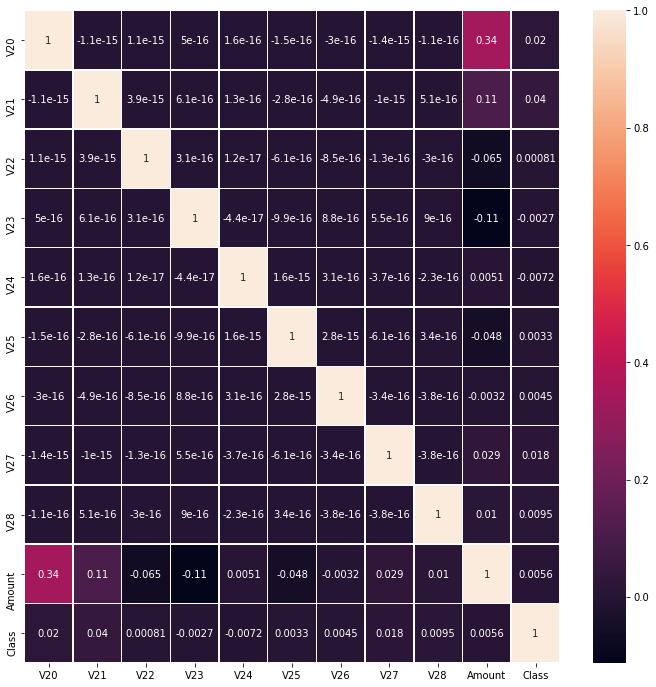

In [15]:
corelation = df[columns_3].corr()
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(corelation, annot=True, linewidths=.5, ax=ax)

# V20 has 0.34 and V21 has 0.11 corelation with Amount

In [16]:
df['V14'].describe()

count    2.848070e+05
mean     1.479045e-15
std      9.585956e-01
min     -1.921433e+01
25%     -4.255740e-01
50%      5.060132e-02
75%      4.931498e-01
max      1.052677e+01
Name: V14, dtype: float64

In [17]:
df['V17'].describe()

count    2.848070e+05
mean    -7.528491e-16
std      8.493371e-01
min     -2.516280e+01
25%     -4.837483e-01
50%     -6.567575e-02
75%      3.996750e-01
max      9.253526e+00
Name: V17, dtype: float64

Visualizing Correlation Matrix of all features

In [98]:
df.shape # checking numbers of column for making Correlation Matrix

(284807, 31)

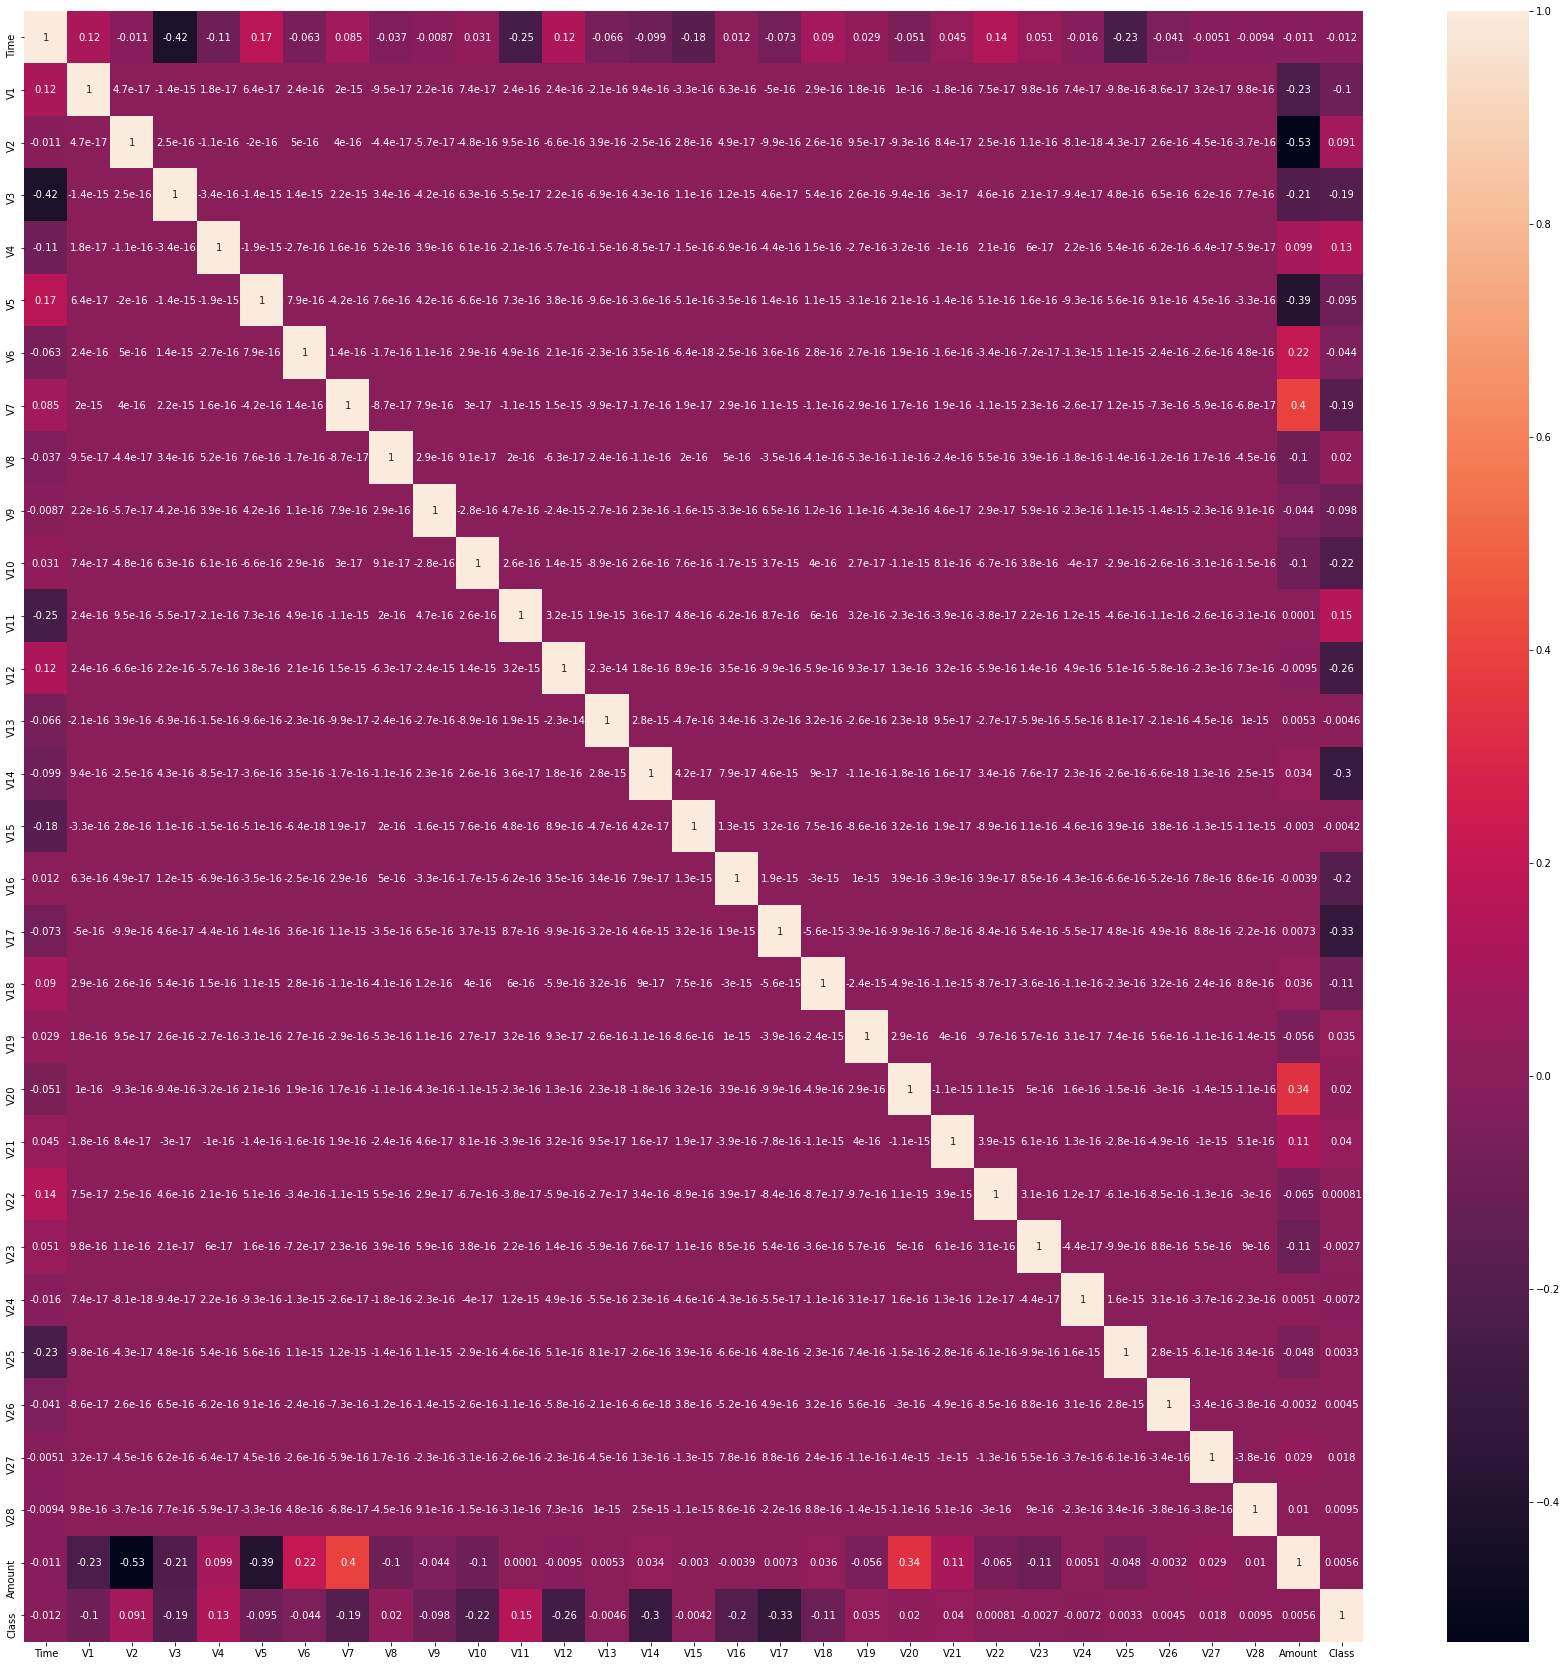

In [99]:
cols = list(range(31))  # list of all features
fig, ax = plt.subplots(figsize=(30,30)) # defining the size and shape of the plot
corelation = df.iloc[:,cols].corr() 
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)
plt.savefig('range all.png') # saving the plot

# check saved file

In [101]:
# we can see that there is very less correlation between main features (V1 to V28) so these are ready to feed in our model

## Analysis and Visualization of our problem

In [18]:
df.Class.value_counts() # checking the count of values in Class column

0    284315
1       492
Name: Class, dtype: int64

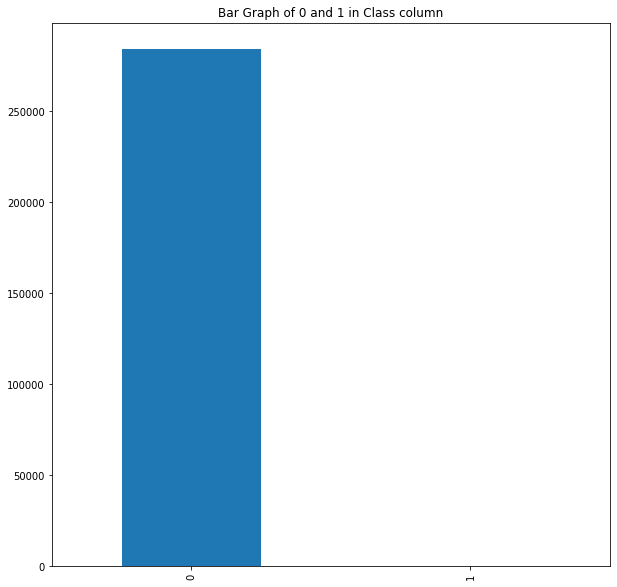

In [19]:
df.Class.value_counts().plot(kind='bar', figsize = (10,10), title = 'Bar Graph of 0 and 1 in Class column')
# as we can see that 1 (fraud) is very less than 0 (Not fraud)

In [102]:
# for better representation we can plot these values on logrithmic scale

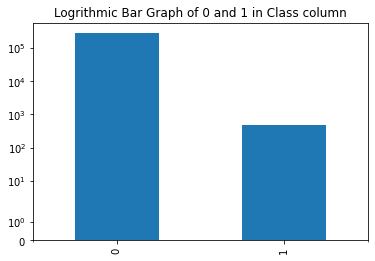

In [20]:
df.Class.value_counts().plot(kind='bar',  loglog = 'sym', title = 'Logrithmic Bar Graph of 0 and 1 in Class column')

 Now we clearly see that this data is imbalanced

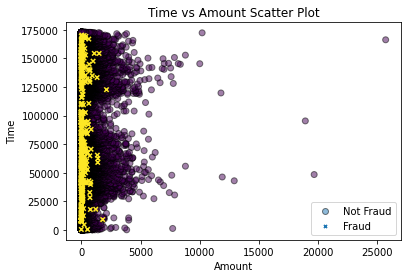

In [21]:
plt.scatter(df.Amount, df.Time, c=df.Class,alpha = 0.5,edgecolor='black',linewidth= 1, label = 'Not Fraud')
plt.scatter(df.Amount, df.Time, marker = 'x', s = 20*df.Class , c = df.Class, label = 'Fraud')
plt.title('Time vs Amount Scatter Plot')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.legend()
plt.show()

In [22]:
df.Amount[df.Class == 1].max()  # maximum amount related to the fraud case is 2125.87 units

2125.87

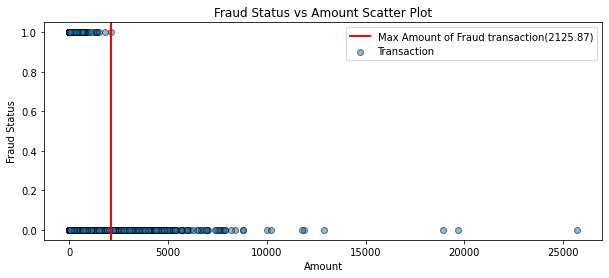

In [23]:
fig, ax = plt.subplots(figsize=(10,4))  
plt.scatter(df.Amount, df.Class ,alpha = 0.5,edgecolor='black',linewidth= 1, label = 'Transaction')
plt.axvline(df.Amount[df.Class == 1].max(),linewidth = 2,c = 'red' ,label='Max Amount of Fraud transaction(2125.87)' )
plt.title('Fraud Status vs Amount Scatter Plot')
plt.xlabel('Amount')
plt.ylabel('Fraud Status')
plt.legend()
plt.show()

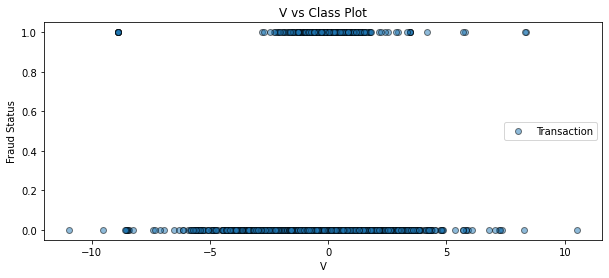

In [24]:
fig, ax = plt.subplots(figsize=(10,4))  
plt.scatter(df.V22, df.Class ,alpha = 0.5,edgecolor='black',linewidth= 1, label = 'Transaction')

plt.title('V vs Class Plot')
plt.xlabel('V')
plt.ylabel('Fraud Status')
plt.legend()
plt.show()
# V10 has -0.22, V12 has -0.26, V14 has -0.3, V16 has -0.2, V17 has -0.33 and V18 has -0.11 corelation with Class


In [25]:
df.Time[df.Class == 1].describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

# Splitting the Features and Target variables

In [26]:
X = df.iloc[:, df.columns != 'Class'].values # Selecting All columns except Class column 
y = df.iloc[:, df.columns == 'Class'].values # Selecting Only Class column 

In [27]:
X.shape # shape of X

(284807, 30)

In [28]:
y.shape # shape of y

(284807, 1)

# Train-Test Split

In [193]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [194]:
X_train.shape # shape of X_train

(227845, 30)

In [190]:
X_test.shape # shape of X_test

(56962, 30)

In [191]:
y_train.shape # shape of y_train

(170883, 1)

In [192]:
y_test.shape # shape of y_test

(56962, 1)

# Default Xgboost Classifier model

In [196]:
# Xgboost model
from xgboost import XGBClassifier
classifier = XGBClassifier()

from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
classifier.fit(X_train, y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 0 minutes and 56.65 seconds.


In [207]:
# an error is prevented by replacing y_train with y_train.ravel() [it converts that array shape to (n, )]

X_test prediction on default hyperparameters

In [198]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[56858     6]
 [   18    80]]


0.9995786664794073

In [200]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Whole X set prediction on default hyperparameters

In [201]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, classification_report
y_pred = classifier.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)
accuracy_score(y, y_pred)


[[284298     17]
 [    83    409]]


0.9996488850344268

In [202]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.96      0.83      0.89       492

    accuracy                           1.00    284807
   macro avg       0.98      0.92      0.95    284807
weighted avg       1.00      1.00      1.00    284807



# Hyperparameters tuning with GridSearchCV

In [203]:
from sklearn.model_selection import GridSearchCV

In [204]:
params={
 "learning_rate"    : [0.05, 0.3] ,
 "max_depth"        : [  12, 15]
    
}

In [205]:
# for tracking time
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [206]:
grid_search= GridSearchCV(estimator = classifier,param_grid=params,scoring='f1',n_jobs=-1,cv=5)

In [220]:
from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search.fit(X_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 26 minutes and 58.76 seconds.


In [221]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [222]:
grid_search.best_params_

{'learning_rate': 0.3, 'max_depth': 12}

In [223]:
accuracy = grid_search.best_score_
accuracy

0.8678296895693798

In [224]:
grid_tuned_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

X_test set prediction

In [225]:
grid_tuned_classifier.fit(X_train, y_train.ravel())
y_pred = grid_tuned_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy on X_test set ',accuracy_score(y_test, y_pred))


[[56862     2]
 [   20    78]]
Accuracy on X_test set  0.9996137776061234


In [226]:
print('Classification report on X_test set\n',classification_report(y_test,y_pred))

Classification report on X_test set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



X set prediction

In [227]:
y_pred = grid_tuned_classifier.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)
print('Accuracy on whole X set ',accuracy_score(y, y_pred))

[[284313      2]
 [    20    472]]
Accuracy on whole X set  0.9999227547075739


In [228]:
print('Classification report on whole X set\n',classification_report(y,y_pred))

Classification report on whole X set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      0.96      0.98       492

    accuracy                           1.00    284807
   macro avg       1.00      0.98      0.99    284807
weighted avg       1.00      1.00      1.00    284807



# Hyperparameter tuning with RandomizedSearchCV

In [208]:
from sklearn.model_selection import RandomizedSearchCV

In [209]:
params={
 "learning_rate"    : [0.05, 0.1, 0.2, 0.3, 1 ] ,
 "max_depth"        : [10, 12, 15],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.15, 0.3]
    
}

In [210]:
# for tracking time
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [211]:
random_search= RandomizedSearchCV(estimator = classifier,param_distributions=params,n_iter=10,scoring='f1',n_jobs=-1,cv=5)

In [212]:
from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 54 minutes and 19.71 seconds.


In [75]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [213]:
random_search.best_params_

{'gamma': 0.3, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1}

In [214]:
accuracy = random_search.best_score_
accuracy

0.8713155954767353

In [215]:
random_tuned_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

X_test set prediction

In [216]:
random_tuned_classifier.fit(X_train, y_train.ravel())
y_pred = random_tuned_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy on X_test set ',accuracy_score(y_test, y_pred))

[[56863     1]
 [   20    78]]
Accuracy on X_test set  0.9996313331694814


In [217]:
print('Classification report of X_test set',classification_report(y_test,y_pred))

Classification report of X_test set               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



Whole X set prediction

In [218]:
y_pred = random_tuned_classifier.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)
print('Accuracy on whole X set',accuracy_score(y, y_pred))

[[284314      1]
 [    20    472]]
Accuracy on whole X set 0.9999262658572297


In [219]:
print('Classification report on whole X set',classification_report(y,y_pred))

Classification report on whole X set               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      0.96      0.98       492

    accuracy                           1.00    284807
   macro avg       1.00      0.98      0.99    284807
weighted avg       1.00      1.00      1.00    284807



# Conclusion

In [233]:
conclusion = pd.read_csv('Final_conclusion.csv')

In [234]:
conclusion

,model,xtest_precision,xtest_recall,xtest_f1score,xtest_true_negative,xtest_false_negative,xtest_false_positive,xtest_true_positive,X_test_accuracy,x_precision,x_recall,x_f1score,x_true_negative,x_false_negative,x_false_positive,x_true_positive,X_accuracy,time_taken
0,default,0.93,0.82,0.87,56858,6,18,80,0.999579,0.96,0.83,0.89,284298,17,83,409,0.999649,56.65
1,grid_search_cv,0.97,0.80,0.88,56862,2,20,78,0.999614,1.00,0.96,0.98,284313,2,20,472,0.999923,1618.76
2,randomized_search_cv,0.99,0.80,0.88,56863,1,20,78,0.999631,1.00,0.96,0.98,284314,1,20,472,0.999926,3259.71


In [235]:
conclusion.columns

Index(['model', 'xtest_precision', 'xtest_recall', 'xtest_f1score',
       'xtest_true_negative', 'xtest_false_negative', 'xtest_false_positive',
       'xtest_true_positive', 'X_test_accuracy', 'x_precision', 'x_recall',
       'x_f1score', 'x_true_negative', 'x_false_negative', 'x_false_positive',
       'x_true_positive', 'X_accuracy', 'time_taken'],
      dtype='object')

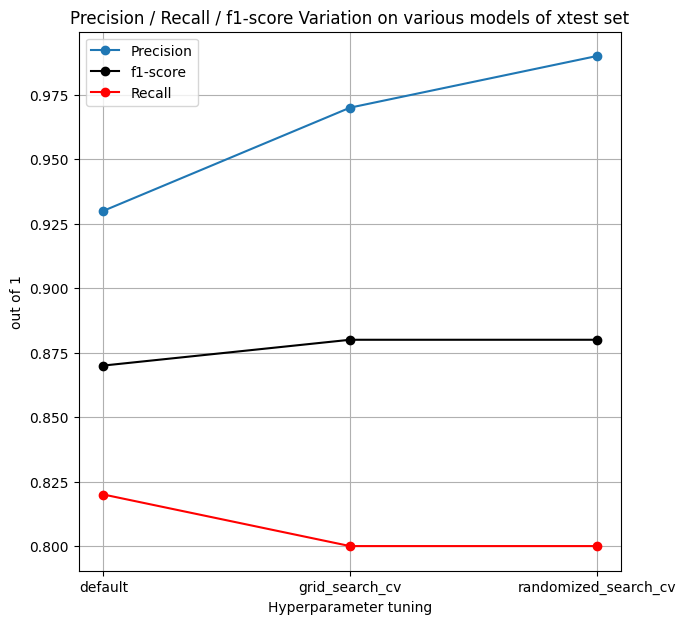

In [236]:
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(conclusion.model,conclusion.xtest_precision, label = 'Precision', marker = 'o')
plt.plot(conclusion.model,conclusion.xtest_f1score, label = 'f1-score', c = 'Black', marker = 'o')
plt.plot(conclusion.model,conclusion.xtest_recall, label = 'Recall', c = 'Red', marker = 'o')
plt.title('Precision / Recall / f1-score Variation on various models of xtest set')
plt.grid()
plt.xlabel('Hyperparameter tuning')
plt.ylabel('out of 1')
plt.legend()
plt.show()

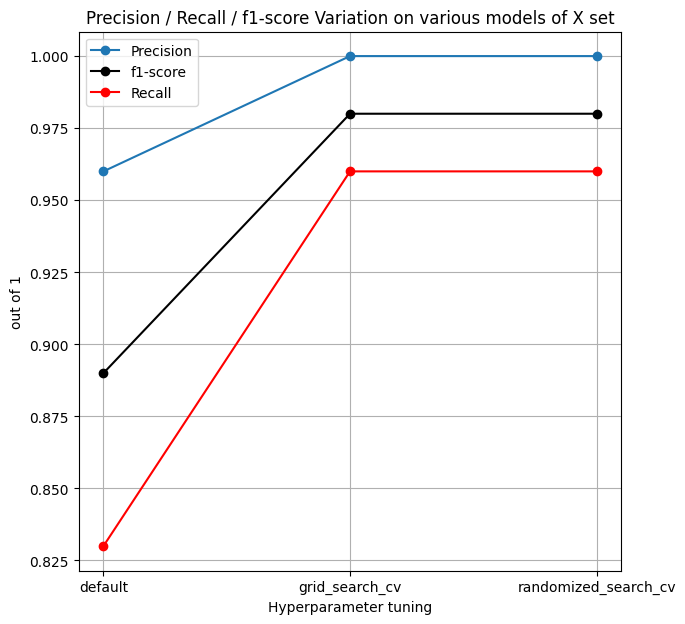

In [237]:
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(conclusion.model,conclusion.x_precision, label = 'Precision', marker = 'o')
plt.plot(conclusion.model,conclusion.x_f1score	, label = 'f1-score', c = 'Black', marker = 'o')
plt.plot(conclusion.model,conclusion.x_recall, label = 'Recall', c = 'Red', marker = 'o')
plt.title('Precision / Recall / f1-score Variation on various models of X set')
plt.grid()
plt.xlabel('Hyperparameter tuning')
plt.ylabel('out of 1')
plt.legend()
plt.show()

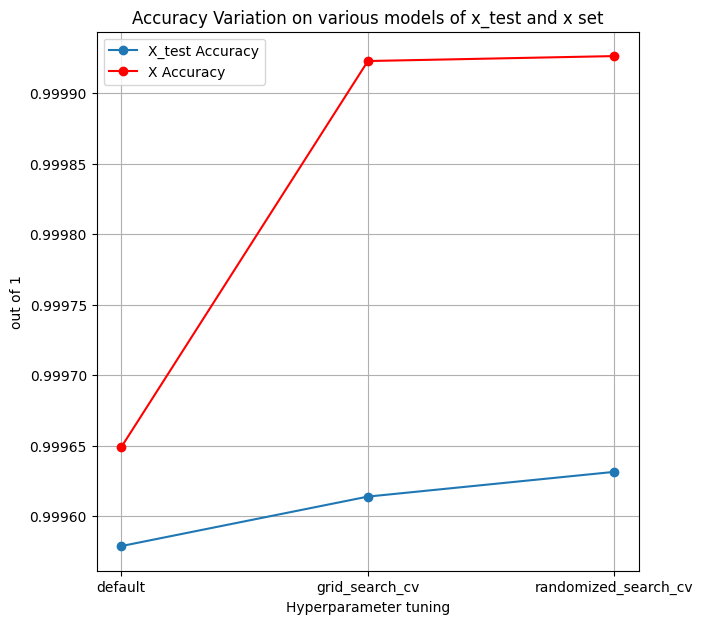

In [238]:
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(conclusion.model,conclusion.X_test_accuracy, label = 'X_test Accuracy', marker = 'o')
plt.plot(conclusion.model,conclusion.X_accuracy, label = 'X Accuracy', c = 'Red', marker = 'o')
plt.title('Accuracy Variation on various models of x_test and x set')
plt.grid()
plt.xlabel('Hyperparameter tuning')
plt.ylabel('out of 1')
plt.legend()
plt.show()

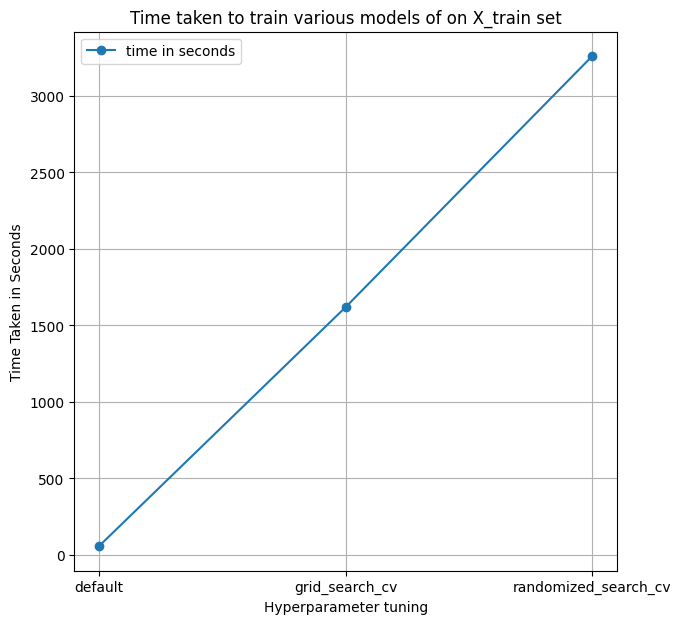

In [239]:
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(conclusion.model,conclusion.time_taken, label = 'time in seconds', marker = 'o')
plt.title('Time taken to train various models of on X_train set')
plt.xlabel('Hyperparameter tuning')
plt.ylabel('Time Taken in Seconds')
plt.legend()
plt.grid()
plt.show()

Conclusion-


1.   Grid Search CV Hyperparameter tuning gave better results in less time (with 4 parameters' grid). But it takes more time when grid is bigger.
2.   Accuracy, Recall, Precision and f1-score is better for Grid Search CV than Randomized Search SV (with lesser time and lesser grid size of parameters)
3. With the same grid size of parameters, Grid Search CV takes very much time, so this is prohibited for bigger grids.
4. f1-score of 0.88 is achieved by both GridSearchCV and RandomizedSearchCV Hyperparameter tuning on X_test set, But GridSearchCV takes half time in comparison with RandomizedSearchCV and alsoa GridSearchCV took only 4 Hyperparameters' values while RandomizedSearchCV took 13 Hyperparameters' values.


